In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [37]:
# Load the dataset (replace 'your_dataset.csv' with the actual file name and path)
# Load the dataset with a specified encoding
df = pd.read_csv("D:/sanaf/Documents/Sana_internship/Oasis/data sci/spam.csv", encoding='ISO-8859-1')

In [38]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [39]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [41]:
#Cleaning Data
#dropping null values
df1 = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1)

In [42]:
df1.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
df1.rename(columns = {"v1" : "Spam or Ham", "v2":"Mail Message"},inplace = True)
df1.head()

,Spam or Ham,Mail Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
df1.shape

(5572, 2)

In [45]:
df.duplicated().sum()

403

In [47]:
#dropping duplicates
df1 = df1.drop_duplicates(keep = 'first')
df1.duplicated().sum()

0

In [30]:
import warnings
# Your code goes here
# Ignore all warnings
warnings.filterwarnings("ignore")
# Your code that might generate warnings
# Reset warnings to default behavior
#warnings.resetwarnings()

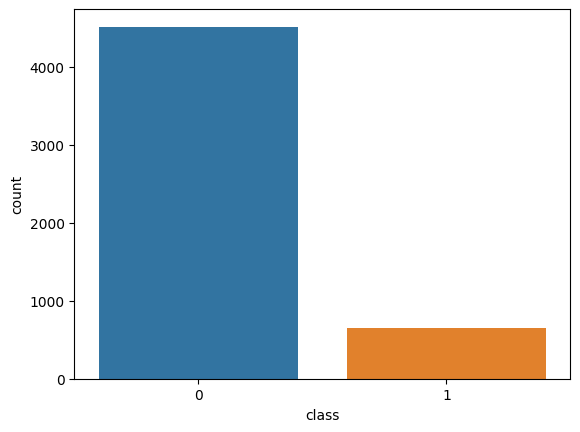

In [31]:
sns.countplot(x=df['class'])
plt.show()

In [46]:
#Converting the categorical values into numerical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1['Spam or Ham'] = encoder.fit_transform(df1['Spam or Ham'])

In [49]:
#Splitting the data
X =  df1["Mail Message"]
y =df1["Spam or Ham"]

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [51]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Create a Logistic Regression classifier
classifier = LogisticRegression()

# Train the classifier
classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2%}')
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Accuracy: 97.87%
Confusion Matrix:
[[885   4]
 [ 18 127]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.97      0.88      0.92       145

    accuracy                           0.98      1034
   macro avg       0.97      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034

